# Combine frequency and severity projections

In [1]:
import pandas as pd
import numpy as np

import data_utils as du

## load the predictor files

In [2]:
freq_train_file = r'freq_train.pkl'
freq_train = pd.read_pickle(freq_train_file)
print(len(freq_train))
    
sev_train_file = r'sev_train.pkl'
sev_train = pd.read_pickle(sev_train_file)
print(len(sev_train))

freq_test_file = r'freq_test.pkl'
freq_test = pd.read_pickle(freq_test_file)
print(len(freq_test))
    
sev_test_file = r'sev_test.pkl'
sev_test = pd.read_pickle(sev_test_file)
print(len(sev_test))
    

394400
394400
169028
169028


In [3]:
data_train = freq_train.join(sev_train['severity_predicted'])
data = freq_test.join(sev_test['severity_predicted'])
data.head()

,ClaimNb,Exposure,Area,VehPower,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,DrivAgeBand,DensityBand,VehAgeBand,severity,freq_predicted,severity_predicted
RecordID,,,,,,,,,,,,,,,,
1,1,0.10,D,5,50,B12,Regular,1217,R82,0.0,"(45,55]","(1e+03,2e+03]",0,0.0,0.730055,102.518522
3,1,0.87,C,5,50,B12,Regular,174,R31,0.0,"(65,Inf]","(100,200]",0,0.0,0.792252,120.447815
5,0,0.87,D,5,50,B12,Regular,1217,R82,0.0,"(55,65]","(1e+03,2e+03]",1,0.0,0.060713,1174.946560
6,0,0.28,B,6,50,B12,Diesel,54,R22,0.0,"(45,55]","(50,100]",3,0.0,0.123208,1186.847855
8,0,0.96,B,7,50,B12,Diesel,76,R72,0.0,"(45,55]","(50,100]",1,0.0,0.045289,1322.703295


Calculate the predictions from 'severity' and 'freq'

In [4]:
# adjust to predict claim numbers

#test data
data_train['ClaimNb_predicted'] = (data_train['freq_predicted']*data_train['Exposure'])
data_train['ClaimNb_predicted_round'] = data_train['ClaimNb_predicted'].round(0)
data_train['freq']= data_train['ClaimNb']/data_train['Exposure']

#train data
data['ClaimNb_predicted'] = data['freq_predicted']*data['Exposure']
data['ClaimNb_predicted_round'] = data['ClaimNb_predicted'].round(0)
data['freq']= data['ClaimNb']/data['Exposure']

# adjust severity projection
data_train['ClaimAmount_predicted'] = data_train['ClaimNb_predicted']*data_train['severity_predicted']
data['ClaimAmount_predicted'] = data['ClaimNb_predicted']*data['severity_predicted']
data_train['ClaimAmount_predicted_round'] = data_train['ClaimNb_predicted_round']*data_train['severity_predicted']
data['ClaimAmount_predicted_round'] = data['ClaimNb_predicted_round']*data['severity_predicted']


data[:20]

,ClaimNb,Exposure,Area,VehPower,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,...,DensityBand,VehAgeBand,severity,freq_predicted,severity_predicted,ClaimNb_predicted,ClaimNb_predicted_round,freq,ClaimAmount_predicted,ClaimAmount_predicted_round
RecordID,,,,,,,,,,,,,,,,,,,,,
1,1,0.10,D,5,50,B12,Regular,1217,R82,0.0,...,"(1e+03,2e+03]",0,0.0,0.730055,102.518522,0.073005,0.0,10.000000,7.484411,0.000000
3,1,0.87,C,5,50,B12,Regular,174,R31,0.0,...,"(100,200]",0,0.0,0.792252,120.447815,0.689260,1.0,1.149425,83.019806,120.447815
5,0,0.87,D,5,50,B12,Regular,1217,R82,0.0,...,"(1e+03,2e+03]",1,0.0,0.060713,1174.946560,0.052820,0.0,0.000000,62.060708,0.000000
6,0,0.28,B,6,50,B12,Diesel,54,R22,0.0,...,"(50,100]",3,0.0,0.123208,1186.847855,0.034498,0.0,0.000000,40.944078,0.000000
8,0,0.96,B,7,50,B12,Diesel,76,R72,0.0,...,"(50,100]",1,0.0,0.045289,1322.703295,0.043478,0.0,0.000000,57.508371,0.000000
12,0,0.12,B,7,50,B12,Diesel,60,R52,0.0,...,"(50,100]",1,0.0,0.046062,1212.164141,0.005527,0.0,0.000000,6.700166,0.000000
17,0,0.92,E,7,80,B1,Regular,2472,R82,0.0,...,"(2e+03,5e+03]",12,0.0,0.200932,1158.738572,0.184858,0.0,0.000000,214.201563,0.000000
28,0,0.87,C,5,50,B12,Regular,455,R91,0.0,...,"(400,1e+03]",1,0.0,0.054648,1162.076968,0.047544,0.0,0.000000,55.249738,0.000000
30,0,0.87,D,5,50,B12,Regular,781,R31,0.0,...,"(400,1e+03]",1,0.0,0.196275,1207.618810,0.170759,0.0,0.000000,206.211598,0.000000


## Output the results file

In [5]:
len(data)

169028

In [6]:
data_train.to_csv('output_train.csv')
data.to_csv('output_test.csv')

## Claim counts - Look at the stats 

In [7]:
data_train['freq'] = data_train['ClaimNb']/data_train['Exposure']
data_train[['ClaimNb','ClaimNb_predicted_round',
           'freq','freq_predicted']].describe()

,ClaimNb,ClaimNb_predicted_round,freq,freq_predicted
count,394400.000000,394400.000000,394400.000000,394400.000000
mean,0.065360,0.003205,0.140581,0.113137
std,0.288774,0.074686,0.844459,0.164135
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.054385
50%,0.000000,0.000000,0.000000,0.086980
75%,0.000000,0.000000,0.000000,0.134346
max,16.000000,13.000000,48.484848,13.116586


## Severity/Claim Amount - Look at the stats

In [8]:
data_train[['ClaimAmount','ClaimAmount_predicted', 
           'severity','severity_predicted']].describe()

,ClaimAmount,ClaimAmount_predicted,severity,severity_predicted
count,394400.000000,394400.000000,394400.000000,394400.000000
mean,87.941645,80.079714,82.456549,1258.976892
std,2131.856196,109.693756,2047.878498,381.339346
min,0.000000,0.000000,0.000000,36.828598
25%,0.000000,27.763041,0.000000,1054.381585
50%,0.000000,57.210158,0.000000,1228.852530
75%,0.000000,104.506560,0.000000,1416.156004
max,774411.500000,15961.673945,774411.500000,4599.056102


# Plot frequency prediction

Area
VehPower
VehBrand
VehGas
Region
DrivAgeBand
DensityBand
VehAgeBand
ClaimNb
--target
ClaimNb_predicted
--target


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


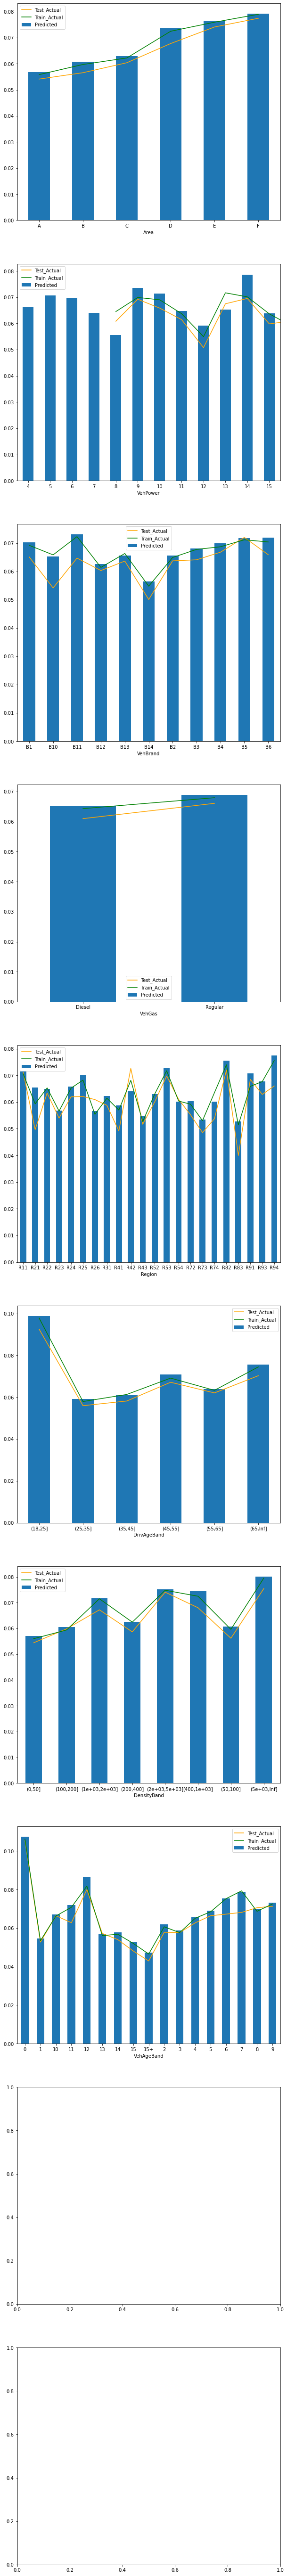

In [9]:
target_actual = 'ClaimNb'
target_predicted = 'ClaimNb_predicted'

cols = ['Area',
        'VehPower',
        'VehBrand',
        'VehGas',
        'Region',
        'DrivAgeBand',
        'DensityBand',
        'VehAgeBand',
       target_actual,target_predicted]


data_to_plot = data[cols]
data_to_plot_train = data_train[cols]

fig = du.plot_factors(data_to_plot, target_actual, target_predicted,data_to_plot_train)
#fig = du.plot_factors(data_to_plot_train, 'ClaimAmount', 'ClaimAmount_predicted')

fig.show()

## Plot Severity Prediction

Area
VehPower
VehBrand
VehGas
Region
DrivAgeBand
DensityBand
VehAgeBand
severity
--target
severity_predicted
--target


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


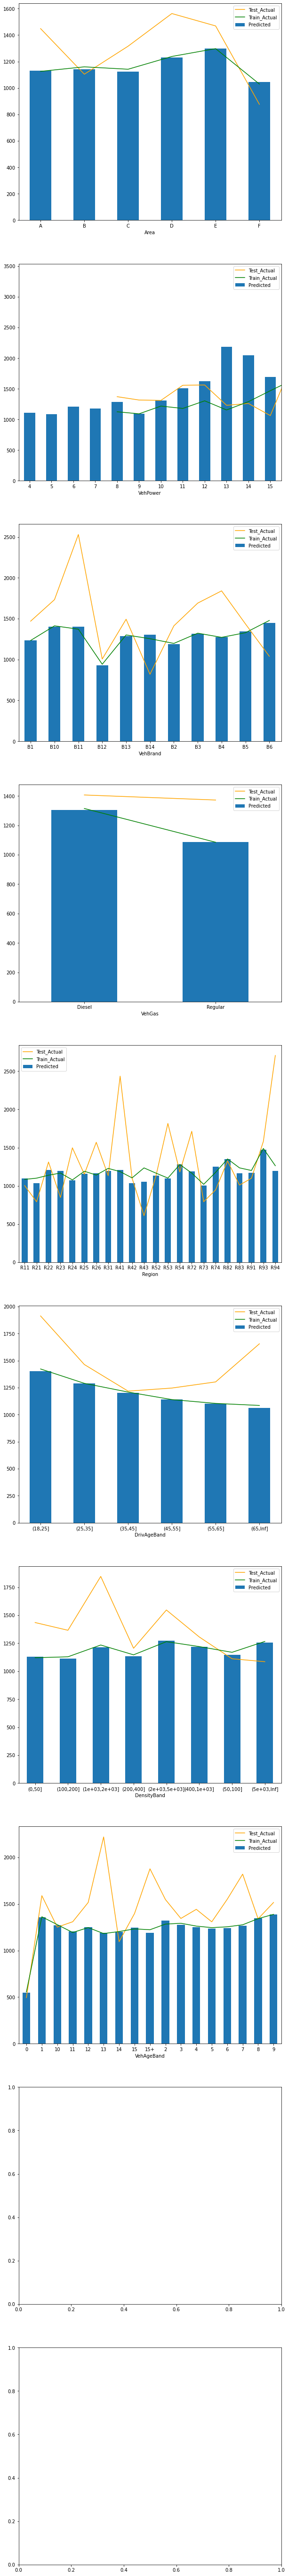

In [10]:
target_actual = 'severity'
target_predicted = 'severity_predicted'

cols = ['Area',
        'VehPower',
        'VehBrand',
        'VehGas',
        'Region',
        'DrivAgeBand',
        'DensityBand',
        'VehAgeBand',
       target_actual,target_predicted]


data_to_plot = data[cols].loc[data['ClaimNb']>0].copy()
data_to_plot_train = data_train[cols].loc[data_train['ClaimNb']>0].copy()

fig = du.plot_factors(data_to_plot, target_actual, target_predicted,data_to_plot_train)
#fig = du.plot_factors(data_to_plot_train, 'ClaimAmount', 'ClaimAmount_predicted')

fig.show()